In [1]:
# Obejective: Predict whether the patient will get pregnant based on IVF treatment factors

In [2]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#  load the dataset
df = pd.read_csv("HealthCareProject.csv")

In [4]:
#About the Dataset
df.head()

# v1 - Age
# v2 - Classifier - Primary, secondary i.e., sterility. >> 
    # (Primary infertility (The patient has never conceived before).Secondary infertility (The patient has conceived before but is now struggling with infertility))
# v3 - Years before pregnancy(Years after marriage) 
# v4 - Classifier - infertity by m, f, both m and f
# v5 - Classifier - whose egg we are using, self or donatd
# v6 - Classifier - male sperm (self or donor or combination of both)
# v7 - classifier - method to activate sperms, stimulation
# v8--  how we got sperms 4 to 5 methods, example masturbation, etc. --- outcome classifier.
# v9 - Categorical number - No of eggs.
# v10 - Predictive Outcomes - classifier - no of eggs formed - Intermediate outcomes - How many eggs formed 
#v11 - Predictive outcomes - classifier - How many eggs got converted to embryosss
# v12 - Does it come under input variable in first tier or second tier. Immediately or after frozen
# v13 – Pregnant (Yes/No)


,Unnamed: 0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,METype,1,1,1.0,1,1,1,1,1,1,2,2,1,3
1,C1,32,2,3.5,3,1,1,2,1,5,2,3,2,1
2,C2,42,1,3.5,3,1,1,1,2,3,2,3,2,3
3,C3,29,2,3.5,2,1,1,1,2,8,7,8,2,1
4,C4,23,1,3.0,3,1,1,1,2,15,9,9,2,1


In [5]:
#dropped unnecessary  column and row and resetting index 

df = df.drop(columns='Unnamed: 0').drop(index=0).reset_index(drop=True)


In [6]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,32,2,3.5,3,1,1,2,1,5,2,3,2,1
1,42,1,3.5,3,1,1,1,2,3,2,3,2,3
2,29,2,3.5,2,1,1,1,2,8,7,8,2,1
3,23,1,3.0,3,1,1,1,2,15,9,9,2,1
4,22,1,5.0,3,1,1,1,1,5,3,3,2,3


In [7]:
#statistical View of columns (count, mean , STD, min ,max etc)
print(df.describe())

               v1          v2          v3          v4          v5          v6  \
count  224.000000  224.000000  224.000000  224.000000  224.000000  224.000000   
mean    31.482143   10.254464   20.089732   16.098214   23.491071   23.424107   
std      5.305860   94.058957  114.387135  114.776090  147.729573  147.739783   
min     18.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     28.000000    1.000000    3.375000    3.000000    1.000000    1.000000   
50%     31.000000    1.000000    6.000000    3.000000    1.000000    1.000000   
75%     35.000000    2.000000   10.000000    3.000000    1.000000    1.000000   
max     49.000000  999.000000  999.000000  999.000000  999.000000  999.000000   

               v7         v8          v9         v10         v11         v12  \
count  224.000000  224.00000  224.000000  224.000000  224.000000  224.000000   
mean   210.433036  108.71875  122.812500  130.580357  130.723214  130.977679   
std    407.260689  309.09484  

In [8]:
for col in df.columns:
    df[col] = df[col].replace(999, df[col].median())


In [9]:
#checking for unique values to understand variables that need to be replaced
for col in df.columns:
    unique_vals = df[col].unique()
    num_unique = len(unique_vals)
    print(f"Column: {col}")
    print(f" - Unique values ({num_unique}): {unique_vals}\n")

    print("*"*50)

Column: v1
 - Unique values (28): [32 42 29 23 22 27 44 34 49 30 25 39 28 45 18 19 38 26 31 40 35 36 43 33
 37 24 41 21]

**************************************************
Column: v2
 - Unique values (2): [2 1]

**************************************************
Column: v3
 - Unique values (26): [ 3.5  3.   5.  13.  15.  27.   2.   1.3  1.   8.  10.   2.5 12.   4.
  7.   6.  17.   9.  11.  19.   4.5 14.  16.   1.5  5.5  2.4]

**************************************************
Column: v4
 - Unique values (4): [3 2 1 4]

**************************************************
Column: v5
 - Unique values (2): [1 2]

**************************************************
Column: v6
 - Unique values (3): [1 2 3]

**************************************************
Column: v7
 - Unique values (2): [2 1]

**************************************************
Column: v8
 - Unique values (5): [1 2 4 3 5]

**************************************************
Column: v9
 - Unique values (19): [ 5  3  8 15 16 1

array([[<Axes: title={'center': 'v1'}>, <Axes: title={'center': 'v2'}>,
        <Axes: title={'center': 'v3'}>, <Axes: title={'center': 'v4'}>],
       [<Axes: title={'center': 'v5'}>, <Axes: title={'center': 'v6'}>,
        <Axes: title={'center': 'v7'}>, <Axes: title={'center': 'v8'}>],
       [<Axes: title={'center': 'v9'}>, <Axes: title={'center': 'v10'}>,
        <Axes: title={'center': 'v11'}>, <Axes: title={'center': 'v12'}>],
       [<Axes: title={'center': 'v13'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

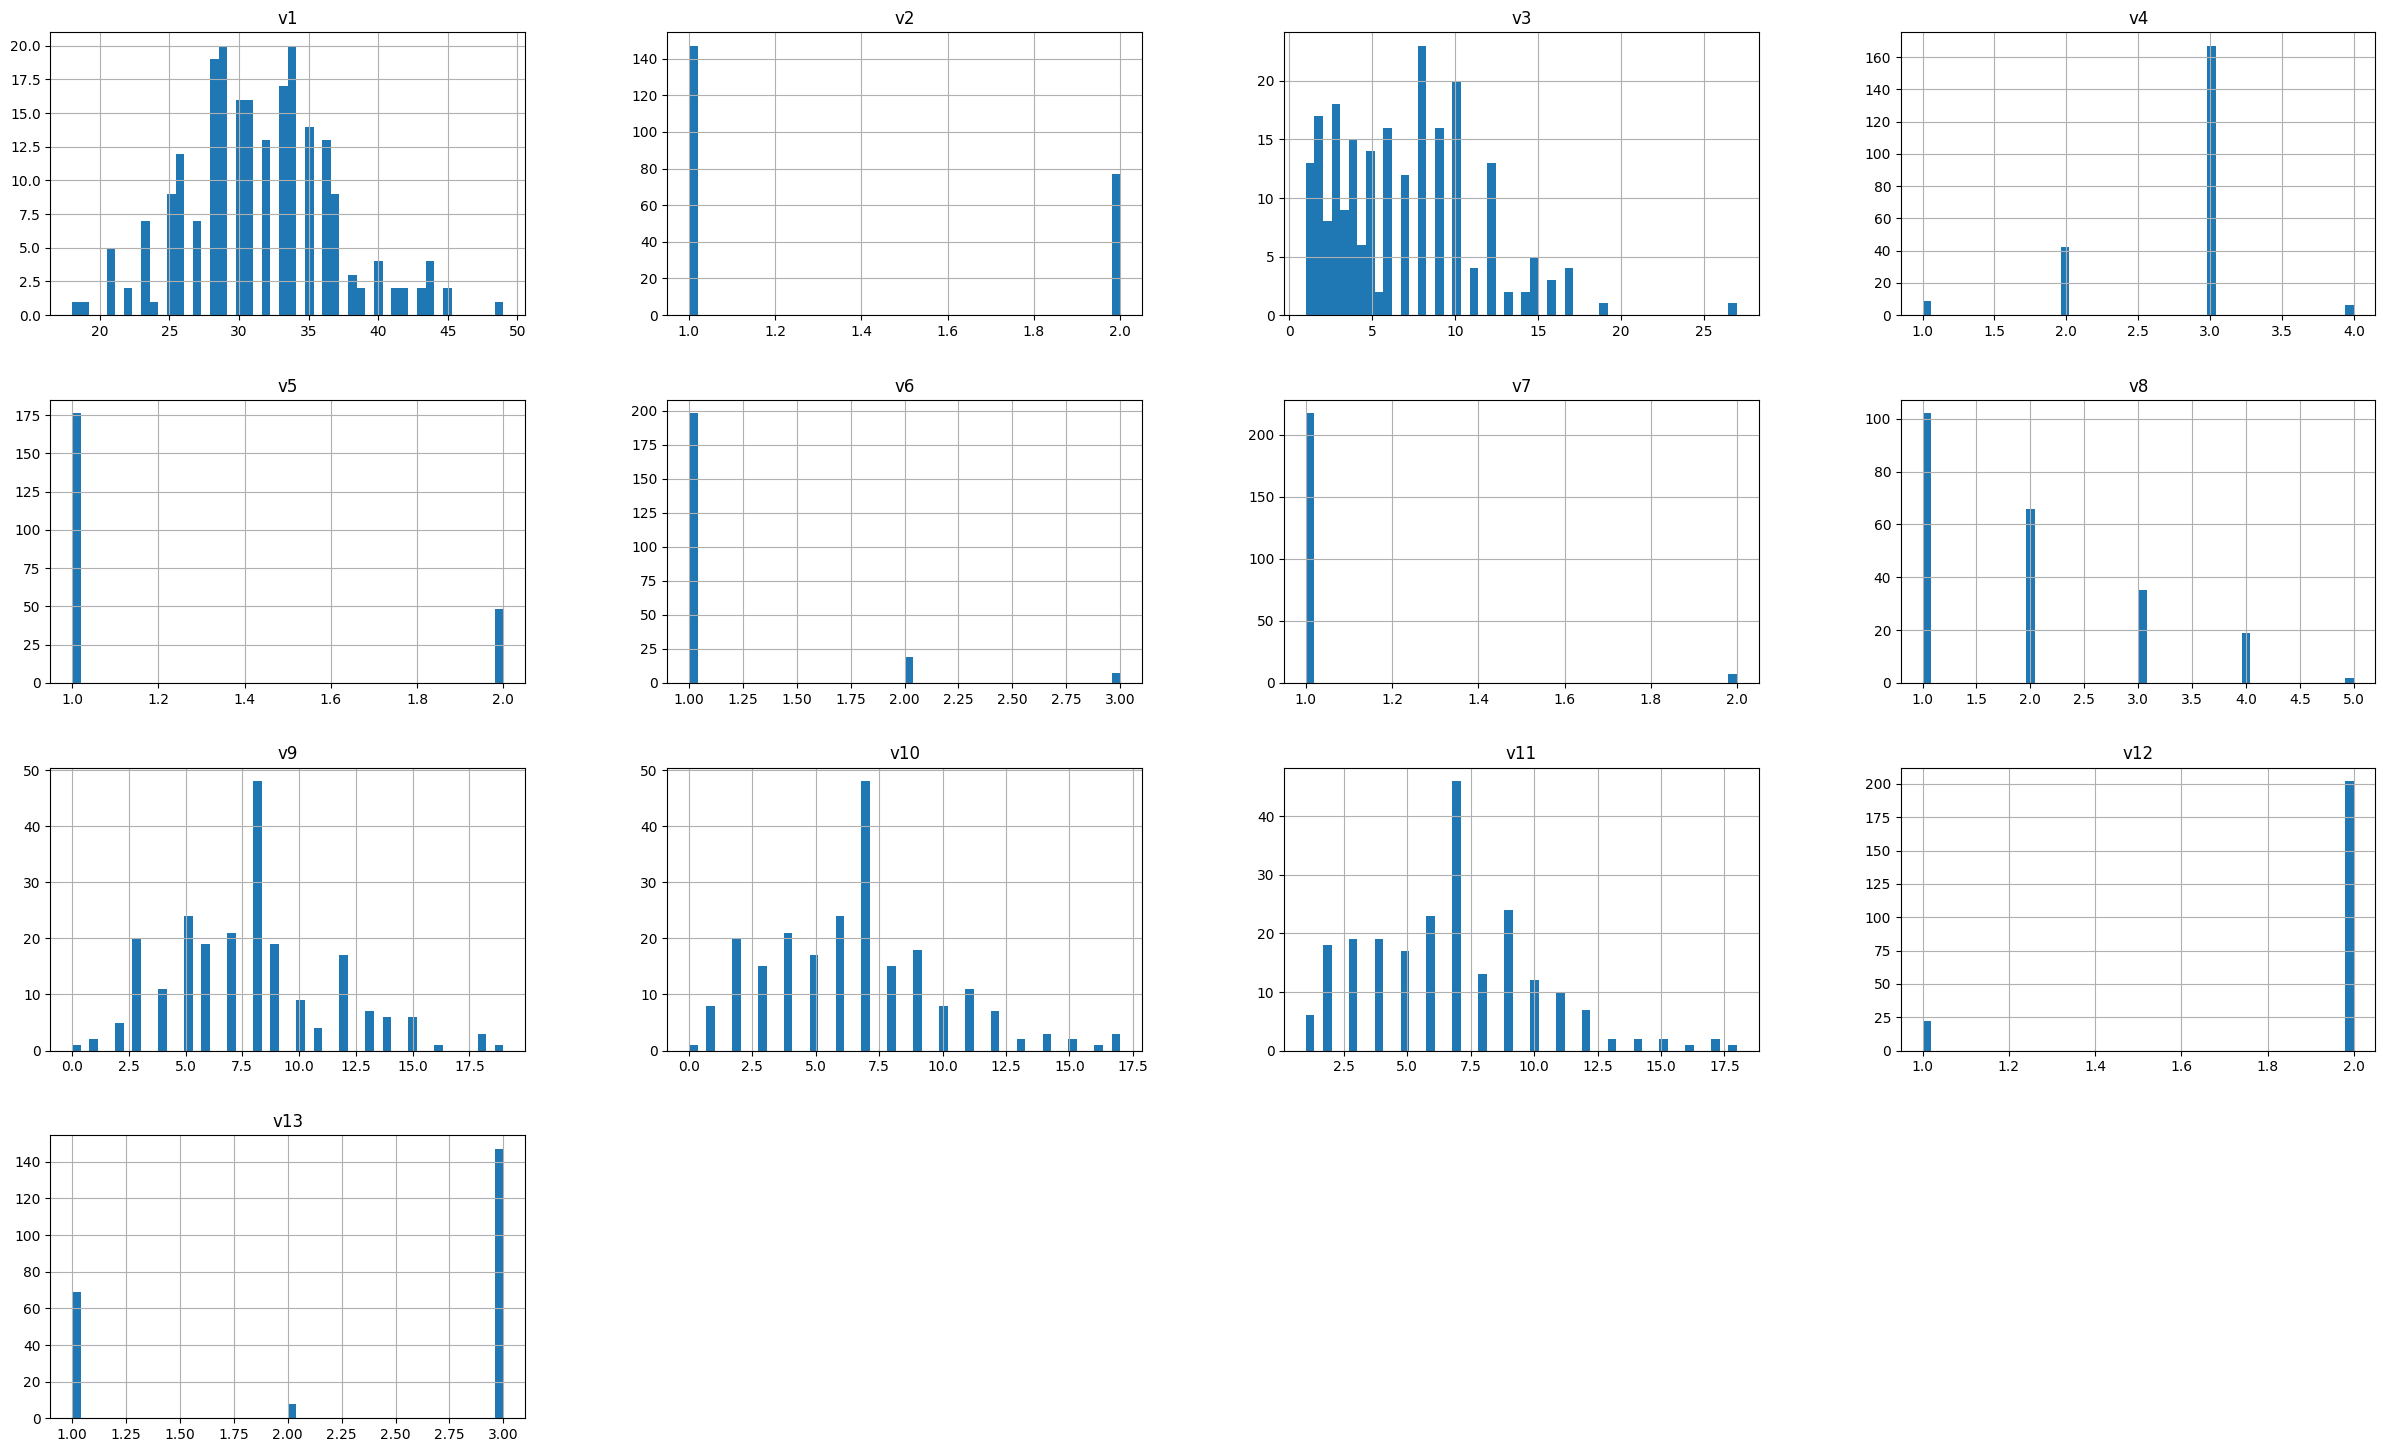

In [10]:
df.hist(bins = 50, figsize=(30,18))

In [11]:
# #saved the file with different name 
# df.to_csv('new27file_file.csv', index=False)

In [12]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,32,2,3.5,3,1,1,2,1,5,2,3,2,1
1,42,1,3.5,3,1,1,1,2,3,2,3,2,3
2,29,2,3.5,2,1,1,1,2,8,7,8,2,1
3,23,1,3.0,3,1,1,1,2,15,9,9,2,1
4,22,1,5.0,3,1,1,1,1,5,3,3,2,3


In [13]:
# Decision: Since 3 occurs when the number of eggs formed is 0, 
# it clearly represents "Failure / No Pregnancy" (0).
# We merge 3 into 0 (No Pregnancy) and keep 1 and 2 as "Success" (1).
df['v13'] = df['v13'].replace({1: 1, 2: 1, 3: 0})  # 1 = Success, 0 = Failure

In [14]:
print(df['v13'].value_counts())

v13
0    147
1     77
Name: count, dtype: int64


In [15]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,32,2,3.5,3,1,1,2,1,5,2,3,2,1
1,42,1,3.5,3,1,1,1,2,3,2,3,2,0
2,29,2,3.5,2,1,1,1,2,8,7,8,2,1
3,23,1,3.0,3,1,1,1,2,15,9,9,2,1
4,22,1,5.0,3,1,1,1,1,5,3,3,2,0


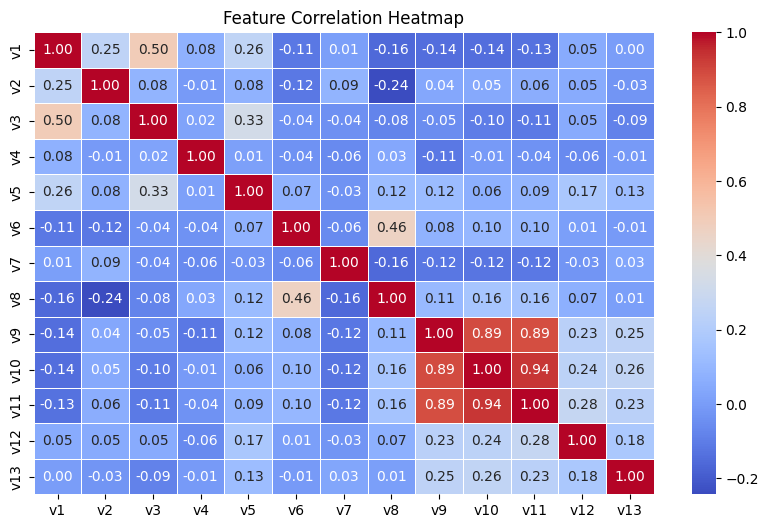

In [16]:
### 1️⃣ Correlation Analysis ###
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# # Drop v10  as v10 is has high correlation with v9 and v11 
# df = df.drop(columns=['v4','v6','v8','v5','v10'])

# # Check dataset after dropping
# print(df.head())

# # v2  v3  v7  v11  v12

In [18]:
# Define categorical columns
categorical_cols = ['v2', 'v3' ,'v4','v5','v6','v7', 'v8' , 'v9', 'v11' , 'v12']

# One-Hot Encode these columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Avoid dummy variable trap

df.head()


,v1,v10,v13,v2_2,v3_1.3,v3_1.5,v3_2.0,v3_2.4,v3_2.5,v3_3.0,...,v11_10,v11_11,v11_12,v11_13,v11_14,v11_15,v11_16,v11_17,v11_18,v12_2
0,32,2,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,42,2,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,29,7,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,23,9,1,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,22,3,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   v1       224 non-null    int64
 1   v10      224 non-null    int64
 2   v13      224 non-null    int64
 3   v2_2     224 non-null    bool 
 4   v3_1.3   224 non-null    bool 
 5   v3_1.5   224 non-null    bool 
 6   v3_2.0   224 non-null    bool 
 7   v3_2.4   224 non-null    bool 
 8   v3_2.5   224 non-null    bool 
 9   v3_3.0   224 non-null    bool 
 10  v3_3.5   224 non-null    bool 
 11  v3_4.0   224 non-null    bool 
 12  v3_4.5   224 non-null    bool 
 13  v3_5.0   224 non-null    bool 
 14  v3_5.5   224 non-null    bool 
 15  v3_6.0   224 non-null    bool 
 16  v3_7.0   224 non-null    bool 
 17  v3_8.0   224 non-null    bool 
 18  v3_9.0   224 non-null    bool 
 19  v3_10.0  224 non-null    bool 
 20  v3_11.0  224 non-null    bool 
 21  v3_12.0  224 non-null    bool 
 22  v3_13.0  224 non-null    b

(224, 76)

In [20]:

#Converting Boolean value ture or false to 1 or 0
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
print(df.head())

   v1  v10  v13  v2_2  v3_1.3  v3_1.5  v3_2.0  v3_2.4  v3_2.5  v3_3.0  ...  \
0  32    2    1     1       0       0       0       0       0       0  ...   
1  42    2    0     0       0       0       0       0       0       0  ...   
2  29    7    1     1       0       0       0       0       0       0  ...   
3  23    9    1     0       0       0       0       0       0       1  ...   
4  22    3    0     0       0       0       0       0       0       0  ...   

   v11_10  v11_11  v11_12  v11_13  v11_14  v11_15  v11_16  v11_17  v11_18  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   v12_2  
0      1  
1      1  
2      1  
3      1  
4      1  

[

In [21]:
# Define features and target
X = df.drop(columns=['v13'])

In [22]:
y = df['v13']  # Target (Pregnancy Outcome)

In [23]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)  # Preserves class ratio in splits

In [32]:

# Train the Random Forest Model
model = RandomForestClassifier(n_estimators= 300, max_depth=15, min_samples_leaf=4,class_weight='balanced',random_state=52)

#below gives 57%
# (
#     n_estimators= 300, 
#     max_depth=15,min_samples_split=4,
#     max_features='sqrt',       
#     class_weight='balanced',   
#     random_state=42)


#below gives 60%
# (n_estimators= 200, max_depth=10,min_samples_leaf=4,class_weight='balanced',random_state=42)

#below gives 48%
# (     n_estimators=200,         # 100 trees
#     criterion='gini',         # Use Gini impurity for splits
#     max_depth=None,           # Trees grow until all leaves are pure or contain < min_samples_split
#     min_samples_split=2,      # Minimum samples to split a node
#     min_samples_leaf=1,       # Minimum samples required at a leaf
#     max_features='sqrt',      # Number of features to consider at each split
#     bootstrap=True,           # Use bootstrap samples (sampling with replacement)
#     random_state=None         # Randomness is uncontrolled unless you set this
# )



In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=4, n_estimators=300, random_state=52)

In [34]:
# Make Predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy*100)


Model Accuracy: 66.66666666666666


In [28]:
# Create a DataFrame with Actual and Predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Shuffle and display 10 random rows
print(comparison_df.sample(10, random_state=np.random.randint(1000)))

     Actual  Predicted
203       0          0
220       0          0
167       1          0
189       1          0
46        0          0
140       0          0
44        0          0
8         0          0
136       0          1
207       0          0


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[24  9]
 [ 8  4]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.73      0.74        33
           1       0.31      0.33      0.32        12

    accuracy                           0.62        45
   macro avg       0.53      0.53      0.53        45
weighted avg       0.63      0.62      0.63        45

